In [35]:
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)
import numpy as np
from IPython.display import display

In [36]:
# taking csv prepared earlier to explore data 

filepath = "Enron_Kaggle_dataset/email_features.csv"
# Read the data into a pandas dataframe called emails

df_email = pd.read_csv(filepath)

headers = [header for header in df_email.columns]

print("Successfully loaded {} rows and {} columns!".format(df_email.shape[0], df_email.shape[1]))


Successfully loaded 517401 rows and 12 columns!


In [37]:
df_email.head(1)

,file,message,Message-Body,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-bc,X-Origin
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700...",here is our forecast\n\n,Phillip K Allen,allen-p,2001-05-14 23:39:00+00:00,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,Allen-P


In [38]:
def cleanemail(email):
    return ' '.join([s.strip() for s in email.splitlines()][15:])

df_email['email-body'] = df_email['message'].apply(cleanemail)

In [4]:
df_email = df_email.drop(columns=['message', 'file', 'X-bc'])

In [5]:
df_email.isna().sum()

Message-Body         0
X-From              29
employee             0
Date                 0
Subject          19187
X-Folder            29
X-To              9153
X-cc            388515
X-Origin            29
email-body           0
dtype: int64

In [6]:
# Convert date column to datetime 

df_email["Date"] = pd.to_datetime(df_email["Date"])

print(df_email.iloc[:1]["Date"])

0   2001-05-14 23:39:00+00:00
Name: Date, dtype: datetime64[ns, UTC]


A sample of randomly selected folders from a newly created folders dataframe shows that there were multiple unique folders used by employees.

In [7]:
df_email["X-Folder"].sample(7)

75114                       \Jeff_Dasovich_June2001\Notes Folders\Notes inbox
302828                          \Kay_Mann_June2001_4\Notes Folders\'sent mail
369714                                        \ExMerge - Richey, Cooper\Inbox
345896           \Gerald_Nemec_Dec2000_June2001_2\Notes Folders\All documents
295055                                     \PLOVE (Non-Privileged)\Sent Items
295454                    \PLOVE (Non-Privileged)\Love, Phillip M.\Sent Items
317595    \Kay_Mann_June2001_3\Notes Folders\Off balance sheet_form contracts
Name: X-Folder, dtype: object

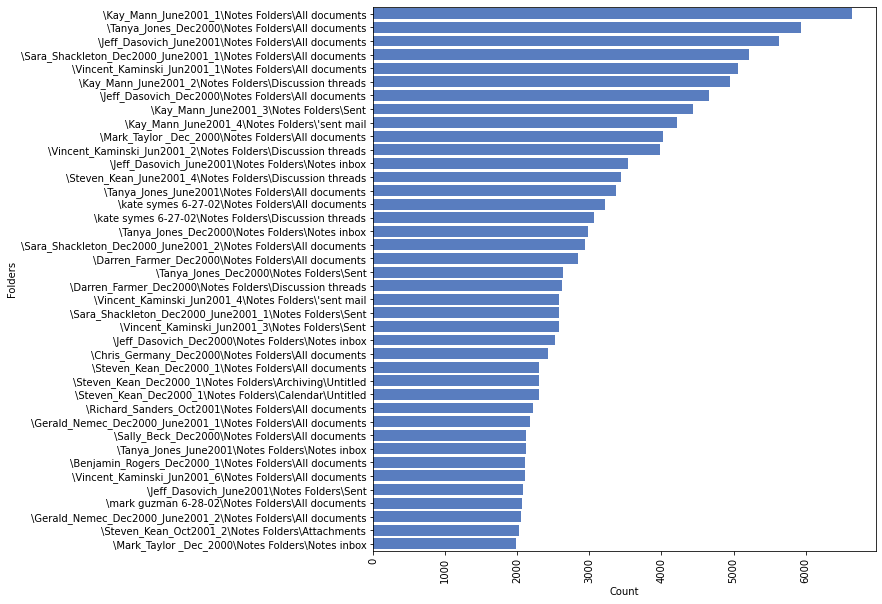

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# dataframe containing counts of every word in the emails dataframe
email_count = df_email["X-Folder"].value_counts()
indices = email_count.index
count = pd.DataFrame(email_count, columns = ["X-Folder"])
count["Folder Names"] = indices
#print count.head()

def barplot(df, X, Y, figsize, color, orient, ylabel, xlabel, font_scale, rotation):
    f, ax = plt.subplots(figsize=figsize)
    sns.set_color_codes("muted")
    sns.barplot(x = X, y = Y, data = df, color = color, orient = orient)
    ax.set(ylabel = ylabel, xlabel = xlabel)
    sns.set(font_scale = font_scale)
    plt.xticks(rotation = rotation) 
    plt.show()
    
barplot(df = count[:40], X = "X-Folder", Y = "Folder Names", figsize = (9, 10), color = 'b', orient = 'h', ylabel = "Folders", xlabel = "Count", font_scale = 1.2, rotation = 90)


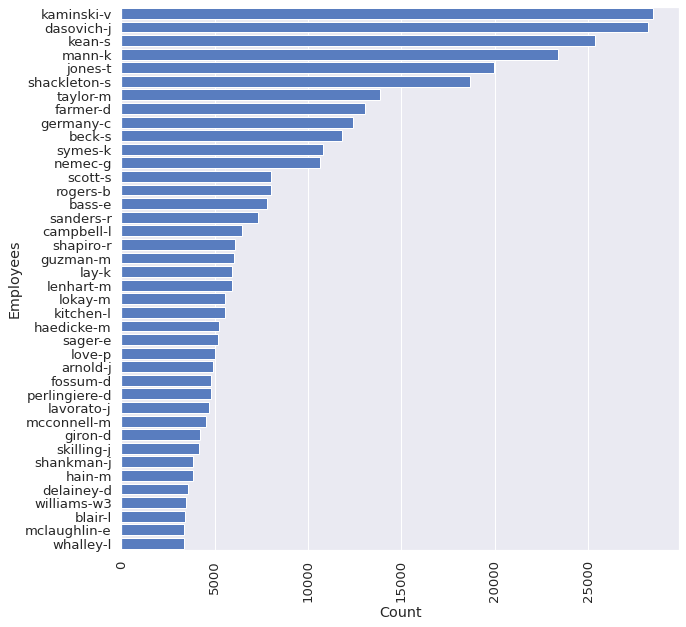

In [9]:
# Bar graph showing 40 employees who had the highest number of sent e-mails

mail_count = df_email["employee"].value_counts()

indices = mail_count.index

count = pd.DataFrame(mail_count)

count.rename(columns = {"employee": "Count"}, inplace = True)

count["Employees"] = indices

barplot(df = count[:40], X = "Count", Y = "Employees", figsize = (10, 10), color = 'b', orient = 'h', ylabel = "Employees", xlabel = "Count", font_scale = .8, rotation = 90)


The `X-Folder` column contains several folders and subfolders that are not needed.
* all_documents
* discussion_threads
* sent
* inbox
* sent_items
* notes_inbox
* _sent_mail
* calendar

In [10]:
def preprocess_folder(data):   
    folders = []
    for item in data:
        if item is None or item is '':
            folders.append(np.nan)
        else:
            item = str(item).split('\\')[-1]
            item = item.lower()
            folders.append(item)
    print("Folder cleaned!")
    return folders


df_email["X-Folder"] = preprocess_folder(df_email["X-Folder"])

<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-10-68ad560b9e2d>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if item is None or item is '':


Folder cleaned!


In [11]:
# Folders we can filter out
unwanted_folders = ["all documents", "discussion threads", "sent","inbox",
                   "sent items", "'sent mail", "untitled", "notes inbox", "junk file", "calendar"]

# A new dataframe without non-topical folders
df_folder = df_email.loc[~df_email['X-Folder'].isin(unwanted_folders)]

print(df_folder.iloc[:15]["X-Folder"].value_counts())

deleted items    13
contacts          2
Name: X-Folder, dtype: int64


In [12]:
df_folder['X-Folder'].value_counts()

deleted items       50987
personal             2642
attachments          2026
meetings             1872
schedule crawler     1398
                    ...  
miscellaneous           1
lavorato, john          1
cooper cameron          1
ecr                     1
water                   1
Name: X-Folder, Length: 1772, dtype: int64

In [13]:
df_folder.groupby('X-Folder').count().sort_values(by= 'email-body', ascending=False).head(50)

,Message-Body,X-From,employee,Date,Subject,X-To,X-cc,X-Origin,email-body
X-Folder,,,,,,,,,
deleted items,50987,50987,50987,50987,49720,50389,9284,50987,50987
personal,2642,2642,2642,2642,2510,2616,280,2642,2642
attachments,2026,2026,2026,2026,1969,2003,725,2026,2026
meetings,1872,1872,1872,1872,1833,49,10,1872,1872
schedule crawler,1398,1398,1398,1398,1396,1398,1391,1398,1398
logistics,1192,1192,1192,1192,1171,1191,636,1192,1192
tw-commercial group,1159,1159,1159,1159,1154,1155,468,1159,1159
california,1052,1052,1052,1052,1028,1038,290,1052,1052
bill williams iii,1022,1022,1022,1022,1005,1021,323,1022,1022


## Department of interest

In [14]:
hr = df_folder.loc[df_folder['X-Folder'] == 'regulatory']

###Some options:

'online trading'
'hr'
'management'
'logistics'
'universities'
'deal discrepancies'
'it'
'meetings'
'projects'
'europe'
'enron news'
'regulatory'

'regulatory'

In [15]:
hr.count()

Message-Body    268
X-From          268
employee        268
Date            268
Subject         266
X-Folder        268
X-To            262
X-cc            124
X-Origin        268
email-body      268
dtype: int64

In [16]:
df_folder[df_folder['X-Folder'] == 'federal emergency']


,Message-Body,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,email-body
248536,fyi\n---------------------- forwarded by richard shapiro/na/enron on 05/21/2001 \n05:26 pm -----...,Richard Shapiro,kean-s,2001-05-21 17:26:00+00:00,Revised Electricity Emergency Authorities Memo,federal emergency,Steven J Kean,NaN,KEAN-S,FYI ---------------------- Forwarded by Richard Shapiro/NA/Enron on 05/21/2001 05:26 PM -------...


In [17]:
df_folder[df_folder['X-Folder'] == 'resumes'].count()

Message-Body    609
X-From          609
employee        609
Date            609
Subject         601
X-Folder        609
X-To            607
X-cc            313
X-Origin        609
email-body      609
dtype: int64

In [18]:
federal =  df_folder[df_folder['X-Folder'] == 'federal legislation']

In [19]:
federal.count()

Message-Body    88
X-From          88
employee        88
Date            88
Subject         88
X-Folder        88
X-To            87
X-cc            39
X-Origin        88
email-body      88
dtype: int64

In [20]:
federal.head(3)

,Message-Body,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,email-body
248537,craig gannet reports:\n\n\n i talked to rich glick this morning about the rumored\nadministratio...,Cynthia Sandherr,kean-s,2000-11-13 15:36:00+00:00,DOE Reliability NOI,federal legislation,"Steven J Kean, Richard Shapiro, Tom Briggs","Linda Robertson, Joe Hillings, Joe Hartsoe, Sarah Novosel",KEAN-S,X-bcc: X-Folder: \Steven_Kean_Dec2000_1\Notes Folders\Federal legislation X-Origin: KEAN-S X-Fil...
248538,"this is the amendment offered per the house commerce committee's request in \norder to allow ""a...",Cynthia Sandherr,kean-s,2000-07-21 10:46:00+00:00,UPDATE: Commerce Staff Proposal/Bliley Certification Replacement\n and Technical Corrections,federal legislation,"Steven J Kean, Richard Shapiro, Joe Hartsoe, Joe Hillings, Tom Briggs, James D Steffes, Chris Lo...","ed@buckham.com, bpaxon@akingump.com, john.runyan@ipaper.com, aae@dellnet.com",KEAN-S,"X-To: Steven J Kean, Richard Shapiro, Joe Hartsoe, Joe Hillings, Tom Briggs, James D Steffes, Ch..."
248539,----- forwarded by cindy derecskey/corp/enron on 05/01/2001 10:53 am -----\n\n\tlinda robertson\...,Cindy Derecskey,kean-s,2001-05-01 10:53:00+00:00,Text of Dick Cheney's Toronto speech yesterday,federal legislation,"Steven J Kean, Karen Denne",NaN,KEAN-S,----- Forwarded by Cindy Derecskey/Corp/Enron on 05/01/2001 10:53 AM ----- Linda Robertson 05/...


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [22]:
## Change the reviews type to string
hr['reviews.text'] = hr['email-body'].astype(str)

<ipython-input-22-43092bae38ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr['reviews.text'] = hr['email-body'].astype(str)


In [23]:
## Lowercase all reviews
hr['reviews.text'] = hr['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

<ipython-input-23-08ca5a67c448>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr['reviews.text'] = hr['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [24]:
import nltk
nltk.download('stopwords')

stop = stopwords.words('english')

hr['reviews.text'] = hr['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /home/becode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-24-b8ac47762126>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr['reviews.text'] = hr['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [25]:
st = PorterStemmer()

hr['reviews.text'] = hr['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

<ipython-input-25-8939f66f4a3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr['reviews.text'] = hr['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


## Sentiment scores: polarity and subjectivity

In [26]:
## Define a function which can be applied to calculate the score for the whole dataset

def senti(x):
    return TextBlob(x).sentiment  

hr['senti_score'] = hr['reviews.text'].apply(senti)

hr.senti_score.head()

<ipython-input-26-828f5d771500>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr['senti_score'] = hr['reviews.text'].apply(senti)


54170        (0.09301146384479718, 0.4460611405055851)
163130      (-0.05555555555555555, 0.1111111111111111)
163131                  (-0.016666666666666663, 0.325)
163132     (-0.03333333333333333, 0.06666666666666667)
163133    (-0.007575757575757576, 0.19696969696969696)
Name: senti_score, dtype: object

In [27]:
# hr.senti_score[28873]

In [28]:
## Iterate on items of senti_score to save values on list
polarity = []
subjective = []
for idx, score in hr.senti_score.iteritems():
    polarity.append(score[0])
    subjective.append(score[1])
    
### What is the overall feeling in the department ?

overall_polarity = np.mean(polarity)
print(f'Overall Polarity:',overall_polarity)
overall_subjectivity = np.mean(subjective)
print(f'Overall Subjectivity:',overall_subjectivity)

# Polarity is float which lies in the range of [-1,1] 
# 1 means positive statement
# -1 means a negative statement

# Subjectivity is a float within the range [0.0, 1.0]
# 0.0 is very objective 
# 1.0 is very subjective,

###Type of scores must be checked; it should be numerical

Overall Polarity: 0.019628697984962893
Overall Subjectivity: 0.3755017111283307


In [29]:
### Sentiments as emojies:

import emoji

def give_emoji_sentiment(score):
    
    if score == 0:
        print(f'Happiness: {round(score*100)}% ')
        print(emoji.emojize("Too many poker faces :expressionless:", use_aliases=True))
    elif (score >0 and score <0.5):
        print(f'Happiness: {round(score*100)}% ')
        print(emoji.emojize("People is slightly happy :blush: ", use_aliases=True))
    elif score > 0.5:
        print(f'Happiness: {round(score*100)}% ')
        print(emoji.emojize("Happy people :smile:", use_aliases=True))
    else:
        print(f'Happiness: {round(score*100)}% ')
        print(emoji.emojize("Angry birds :angry:", use_aliases=True))

          
        
def give_emoji_subjectivity(score):
    
    if score == 0: #Very objective
        print(emoji.emojize("A :100:% objective department :speech_balloon: :memo:", use_aliases=True))
    elif score == 1: #Very subjective
        print(emoji.emojize("A very subjective department :thought_balloon:", use_aliases=True)) 
    else:
        print(emoji.emojize(f"{100 - round(score*100)}% Objective :thought_balloon: ", use_aliases=True))

give_emoji_sentiment(overall_polarity)
give_emoji_subjectivity(overall_subjectivity)

Happiness: 2% 
People is slightly happy 😊 
62% Objective 💭 


In [30]:
break

SyntaxError: 'break' outside loop (<ipython-input-30-6aaf1f276005>, line 1)

In [ ]:
hr.head(2)

### After this line not sure if the code should run: ????

In [ ]:
#Convert date column to datetime 

df_email["Date"] = pd.to_datetime(df_email["Date"])

### Adding classification by year to dataframe:
### Datetime is set as an idex and column year is added
df_email['year'] = pd.DatetimeIndex(df_email['Date']).year

#### Selection of years of interest:
data = df_email[df_email.year > 1998]
data = data[data.year < 2003] 

In [ ]:
# data.head()

In [ ]:
# data = df_email.drop_duplicates(['email-body'])

In [ ]:
# data.shape

In [ ]:
data['X-From'].value_counts().head(5)

In [ ]:
data['X-To'].value_counts().head(3)

In [ ]:
df_employee = df_email.groupby(['employee']).describe()

In [ ]:
PKA = df_email.groupby(['X-From', 'X-To'])

PKA.get_group(('Kay Mann', 'Kay Mann')).count()


In [ ]:
df_email.head(3)

In [ ]:
df_email = df_email.drop(columns=['Message-Body'])

In [ ]:
df_email.head(3)

In [ ]:
#df_email.to_csv('data.csv',index=False)

In [ ]:
#print(df_email.iloc[:]["X-Folder"].nunique())

df_email['X-Folder'].value_counts()

In [ ]:
print(df_email["X-Folder"].sample(7))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 
# dataframe containing counts of every word in the emails dataframe
email_count = df_email["X-Folder"].value_counts()
indices = email_count.index
count = pd.DataFrame(email_count, columns = ["X-Folder"])
count["Folder Names"] = indices
#print count.head()

def barplot(df, X, Y, figsize, color, orient, ylabel, xlabel, font_scale, rotation):
    f, ax = plt.subplots(figsize=figsize)
    sns.set_color_codes("muted")
    sns.barplot(x = X, y = Y, data = df, color = color, orient = orient)
    ax.set(ylabel = ylabel, xlabel = xlabel)
    sns.set(font_scale = font_scale)
    plt.xticks(rotation = rotation) 
    plt.show()
    
barplot(df = count[:40], X = "X-Folder", Y = "Folder Names", figsize = (7, 8), color = 'b', orient = 'h', ylabel = "Folders", xlabel = "Count", font_scale = 1.2, rotation = 90)

In [ ]:
def preprocess_folder(data):
    folders = []
    for item in data:
        if item is None or item is '':
            folders.append(np.nan)
        else:
            item = item.split("\\")[-1]
            item = item.lower()
            folders.append(item)
    print("Folder cleaned!")
    return folders      
df_email["Selected"] = preprocess_folder(df_email["X-Folder"])

In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

In [ ]:
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

In [ ]:
df_email['Date'] = pd.to_datetime(df_email["Date"])
df_email['Date'].dtypes

In [ ]:
df_email.head(3)

In [ ]:
df_email.groupby(['X-From'])

In [ ]:
# value_counts().plot(kind='bar') #### Houston we have an error

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [ ]:
## Change the reviews type to string
data['reviews.text'] = data['email-body'].astype(str)

In [ ]:
data['reviews.text'].head(3)

In [ ]:
## Lowercase all reviews
data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
data['reviews.text'].head(3)

In [ ]:
# remove punctuation
#df_email['reviews.text'] = df_email['reviews.text'].str.replace(pat = [''])

In [ ]:
#df_email['reviews.text'].str.replace('[^ws]','')


In [ ]:
import nltk
nltk.download('stopwords')

stop = stopwords.words('english')

data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
st = PorterStemmer()

data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [ ]:
data['reviews.text'].head(3)

In [ ]:
df_email.head(3)

In [ ]:
## Define a function which can be applied to calculate the score for the whole dataset

def senti(x):
    return TextBlob(x).sentiment  

data['senti_score'] = data['reviews.text'].apply(senti)

data.senti_score.head()

In [ ]:
data.senti_score.head()